In [2]:
import sys
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze
INF = float('inf')

# BFS

## How does it work?

DFS traverses a graph by starting at a root node and exploring all it's neighbors. Then it moves to next depth and explores the neighbors of all nodes at that level. 

BFS is performed starting from a node. If a node lies on the border, it is checked whether there is an
exit from the maze. If yes, the path upto that node and the coordinates of the node are returned.
Since BFS visits every node, the algorithm is guaranteed to find an exit, if one exists.

## Analysis

### Time Complexity : O(N<sup>2</sup>)
1. Every node is visited exactly once
A node is added to the stack only if it’s discovered status is false. Once added to the stack, the
discovered status is set to true. Hence, every node is visited exactly once.
2. Every edge is visited exactly twice
The neighbor of a node is checked exactly once. Since the graph is undirected, this check happens
at both vertices of an edge. Hence, every edge is visited only twice.   
Therefore, it follows that for a graph with V vertices and E edges, the time complexity of DFS is O(V + E)   
V = O(N<sup>2</sup>)  
E = O(N<sup>2</sup>)   

### Additional Space : O(N<sup>2</sup>)  
The discovery of every node has to be tracked. This requires O(N<sup>2</sup>) additional space.   

In [3]:
def bfs(start_position, maze):
    """
    inputs:
        start_position:
            tuple of x, y position of starting node 
        maze:
            Maze object
    """
    x, y = start_position
    #visited array keeps track of which nodes have been visited
    vis = []
    #parents keeps track of the parent node of every node in the DFS tree
    parent = []
    queue = []
    for _ in range(maze.num_rows):
        vis.append(list(bytearray(maze.num_columns)))
        parent.append(list(bytearray(maze.num_columns)))

    queue.append((x, y))
    vis[x][y] = 1
    while(len(queue)):
        current = queue.pop(0)
        x, y = current
        # If not at start, check if at a possible exit i.e at boundary and exit exists
        # If exit exits, return the path to the exit from source
        if((x,y) != start_position):
            if(x == 0 and maze.grid[x][y].neighbors["N"] != INF or 
               y == 0 and maze.grid[x][y].neighbors["W"] != INF or
               x == maze.num_rows-1 and maze.grid[x][y].neighbors["S"] != INF or
               y == maze.num_columns-1 and maze.grid[x][y].neighbors["E"] != INF):
                out = [(x,y)]
                while(parent[x][y] != 0):
                    x, y = parent[x][y]
                    out.append((x,y))
                return out[::-1]
        
        # Add unvisited neighbors to queue and mark them as visited
        if(x > 0):
            if(maze.grid[x][y].neighbors["N"] != INF and vis[x-1][y] == 0):
                queue.append((x-1,y))
                vis[x-1][y] = 1
                parent[x-1][y] = (x,y)
        if(x < maze.num_rows-1):
            if(maze.grid[x][y].neighbors["S"] != INF and vis[x+1][y] == 0):
                queue.append((x+1,y))
                vis[x+1][y] = 1
                parent[x+1][y] = (x,y)
        if(y < maze.num_columns-1):
            if(maze.grid[x][y].neighbors["E"] != INF and vis[x][y+1] == 0):
                queue.append((x,y+1))
                vis[x][y+1] = 1
                parent[x][y+1] = (x,y)
        if(y > 0):
            if(maze.grid[x][y].neighbors["W"] != INF and vis[x][y-1] == 0):
                queue.append((x,y-1))
                vis[x][y-1] = 1
                parent[x][y-1] = (x,y)
                    
    # Return empty list if path does not exist
    return []

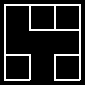

In [4]:
maze = Maze(3,3)
maze.add_path((0,0), "S", 0)
maze.add_path((0,1), "E", 0)
maze.add_path((1,1), "S", 0)
maze.add_path((1,1), "E", 0)
maze.add_path((1,2), "S", 0)
display(maze.draw(cell_width = 25))

In [5]:
out = bfs((0,0), maze)
print(out)

[(0, 0), (1, 0), (1, 1), (2, 1)]


[]


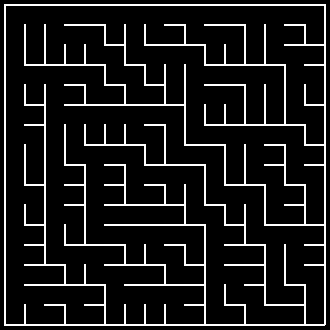

In [7]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")
path = bfs((0, 0), maze)
# maze.add_colors(path)
print(path)
display(maze.draw(cell_width=20))